In [1]:
import pickle
import pandas as pd
import re

with open('data_pickle_format/labeled_vacancies_final.pickle', 'rb') as f:
    real_df = pickle.load(f)

In [2]:
from string import punctuation
import html

def preprocess_text(text):
    text = text.lower()
    text = html.unescape(text)
    text = re.sub(r"https?://\S+", "", text) # remove http links
    text = re.sub(r"<.*?>", " ", text) # remove html tags
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)  # Remove punctuation
    text = " ".join(text.split())  # Remove extra spaces, tabs, and new lines
    return text

real_df["description"] = real_df["description"].map(preprocess_text)

pd.set_option('display.max_colwidth', None)

real_df.head(2)

,description,women_proportion
0,company name ministerie van financi n belastingdienst job requirements tmap next foundation ervaring met projecten in een agile omgeving senior tester met ervaring in testautomatisering 5 jaar kennis en ervaring met agilescrum wensen testtooling robotframework functioneel testen integratietesten performancetesten kennis van xml mq db2 kennis van container platforms location apeldoorn nederland none company info none compensation benefits dit is een opdracht tussen de 32 36 uur per week de startdatum is in overleg en de looptijd van de opdracht is in eerste instantie tot 31 december 2023 waarna er optie tot verlenging is voor deze rol zal je door yacht gedetacheerd worden bij de belastingdienst als senior tester je reiskosten worden uiteraard volledig vergoed een elektrische leaseauto welke je ook priv mag rijden behoort tot de mogelijkheden ook ontvang je een bonusregeling tot maximaal 8 van je bruto jaarsalaris 25 vakantiedagen en 833 vakantiegeld op fulltime jaarbasis daarnaast gaan we graag met je in gesprek over je persoonlijke ontwikkelingsplan en bespreken welke trainingen en opleidingen gewenst zijn want blijven ontwikkelen zijn de sleutelwoorden job type tijdelijke functieopdracht certifications tmap next foundation ervaring met projecten in een agile omgeving senior tester met ervaring in testautomatisering 5 jaar kennis en ervaring met agilescrum wensen testtooling robotframework functioneel testen integratietesten performancetesten kennis van xml mq db2 kennis van container platforms remote possible false,0.40
1,company name belastingdienst job requirements gecertificeerd scrum master minimaal psm ii of vergelijkbaar meerdere jaren aantoonbare ervaring als scrum master waaronder ervaring met safe of andere opschalingsmodellen ervaring met implementatie trajecten binnen een complexe omgeving professioneel vaardig in het nederlands en engels location apeldoorn nederland none company info de iv organisatie van de belastingdienst is verantwoordelijk voor en verzorgt de ict voorzieningen het merendeel van de applicaties wordt op dit moment door de iv organisatie zelf ontwikkeld onderhouden en beheerd in het eigen data center naast de zorg voor continu teit op de massale heffing en inningsprocessen die plaatsvinden binnen een degelijke stabiele omgeving wordt er tevens volop gewerkt aan modernisering van het iv landschap dit gebeurt deels intern door gebruik te maken van de expertise die intern aanwezig is maar ook door het aantrekken van kantenklaar oplossingen en expertise uit de markt compensation benefits auto van de zaak is bespreekbaar en mag uiteraard prive gebruikt worden salaris op basis van kennis en ervaring met een maximum van 5040 per maand indien gewenst direct vast contract voor onbepaalde tijd bij yacht voor deze opdracht geldt een 13e maand en voor andere opdrachten een 13e maand of deelname aan de yacht bonusregeling 833 vakantiegeld 25 vakantiedagen als je belooft dat je er iets leuks mee doet mogelijkheid voor het volgen van opleidingen cursussen trainingen pluspensioen vanaf de eerste werkdag bij ziekte eerste jaar 100 doorbetaald job type tijdelijke functieopdracht certifications gecertificeerd scrum master minimaal psm ii of vergelijkbaar meerdere jaren aantoonbare ervaring als scrum master waaronder ervaring met safe of andere opschalingsmodellen ervaring met implementatie trajecten binnen een complexe omgeving professioneel vaardig in het nederlands en engels remote possible true,0.75


In [3]:
desc = [
    'company name', 'company info', 'job requirements',
    'compensation benefits', 'job type', 'location',
    'certifications', 'remote possible', 'true', 'false'
]

real_df['filtered'] = real_df['description'].str.extract(
    r'job\s*requirements\s*:?\s*(.*?)$',
    flags=re.IGNORECASE | re.DOTALL,
    expand=False
).str.strip()

pattern = r'\b(?:' + '|'.join(map(re.escape, desc)) + r')\b'
real_df['filtered'] = real_df['filtered'].str.replace(pattern, '', regex=True).str.strip()


In [4]:
import py3langid as langid

languages = []
for description in real_df['description']:
    lang, confidence = langid.classify(description)
    languages.append(lang)

real_df['language'] = languages

In [5]:
import spacy
nlpNL = spacy.load("nl_core_news_sm")
nlpEN = spacy.load("en_core_web_sm")

print(real_df.loc[real_df['language'] == 'nl', 'filtered'].head(10).tolist())

def process_nl(text):
    if isinstance(text, str) and text.strip():
        doc = nlpNL(text)
        filtered = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]
        return filtered
    else:
        return []
    
real_df.loc[real_df['language'] == 'nl', 'filtered'] = real_df.loc[real_df['language'] == 'nl', 'filtered'].apply(process_nl)

def process_en(text):
    if isinstance(text, str) and text.strip():
        doc = nlpEN(text)
        return [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]
    else:
        return []

real_df.loc[real_df['language'] == 'en', 'filtered'] = real_df.loc[real_df['language'] == 'en', 'filtered'].apply(process_en)

real_df['filtered'].tail(5)

['tmap next foundation ervaring met projecten in een agile omgeving senior tester met ervaring in testautomatisering 5 jaar kennis en ervaring met agilescrum wensen testtooling robotframework functioneel testen integratietesten performancetesten kennis van xml mq db2 kennis van container platforms  apeldoorn nederland none  none  dit is een opdracht tussen de 32 36 uur per week de startdatum is in overleg en de looptijd van de opdracht is in eerste instantie tot 31 december 2023 waarna er optie tot verlenging is voor deze rol zal je door yacht gedetacheerd worden bij de belastingdienst als senior tester je reiskosten worden uiteraard volledig vergoed een elektrische leaseauto welke je ook priv mag rijden behoort tot de mogelijkheden ook ontvang je een bonusregeling tot maximaal 8 van je bruto jaarsalaris 25 vakantiedagen en 833 vakantiegeld op fulltime jaarbasis daarnaast gaan we graag met je in gesprek over je persoonlijke ontwikkelingsplan en bespreken welke trainingen en opleidingen

2370    [kennis, ervaring, helpen, succesvol, energie, krijgen, functie, it, relateren, enof, bedrijfseconomisch, achtergrond, uitbreiden, ervaring, implementeren, webapplicatie, software, Management, implementatie, bedrijf, kritisch, dienst, product, groot, impact, maatschappij, werken, ontwikkeling, toepassing, divers, api, s, afhankelijkhed, verschillend, functionaliteit, betaalsysteom, applicatie, High, level, analyseren, hierover, begrijpelijk, communiceren, communicatief, mondeling, schriftelijk, vaardig, servicegericht, sterk, onderhouden, klantrelatie, onderling, communicatie, team, divers, stakeholder, mensgericht, teamspeler, richten, samenwerking, resultaat, behalen, verantwoordelijk, kwaliteitsgericht, persoonlijkheid, stressbestendig, relativeren, prioriteren, omgevingsbewustzijn, relevant, ontwikkeling, klant, team, meeweg, actie, wennen, werken, divers, werk, cultuur, communicatie, Engels, Nederlands, spreken,  , Utrecht, welkom, netwerk,  , werk, klein, internationaal, 

In [6]:
en0 = real_df.loc[(real_df['women_proportion'] == 0) & (real_df['language'] =='en')].copy()
en1 = real_df.loc[(real_df['women_proportion'] <= 0.25) & (real_df['language'] =='en')].copy()
en2 = real_df.loc[(real_df['women_proportion'] > 0.25) & (real_df['women_proportion'] <= 0.5) & (real_df['language'] =='en')].copy()
en3 = real_df.loc[(real_df['women_proportion'] > 0.5) & (real_df['women_proportion'] <= 0.75) & (real_df['language'] =='en')].copy()
en4 = real_df.loc[(real_df['women_proportion'] > 0.75) & (real_df['language'] =='en')].copy()
en5 = real_df.loc[(real_df['women_proportion'] == 1) & (real_df['language'] =='en')].copy()


In [7]:
nl0 = real_df.loc[(real_df['women_proportion'] == 0) & (real_df['language'] =='nl')].copy()
nl1 = real_df.loc[(real_df['women_proportion'] <= 0.25) & (real_df['language'] =='nl')].copy()
nl2 = real_df.loc[(real_df['women_proportion'] > 0.25) & (real_df['women_proportion'] <= 0.5) & (real_df['language'] =='nl')].copy()
nl3 = real_df.loc[(real_df['women_proportion'] > 0.5) & (real_df['women_proportion'] <= 0.75) & (real_df['language'] =='nl')].copy()
nl4 = real_df.loc[(real_df['women_proportion'] > 0.75) & (real_df['language'] =='nl')].copy()
nl5 = real_df.loc[(real_df['women_proportion'] == 1) & (real_df['language'] =='nl')].copy()

In [8]:
en0

,description,women_proportion,filtered,language
58,company name scheidt bachmann nederland bv job requirements the position requires a broad skillset because you work with different technologies in the cloud there is still a lot of room for optimization and developments in the field of database specialism you work with a recently designed database own initiatives are highly appreciated you know what can be the next step you work hybrid in a small internationally oriented team with a lot of commitment and responsibility an entrepreneurial atmosphere at our office in utrecht proactive internal collaboration also with international colleagues from the german parent organization and the development and operations teams in slovakia you work with multiple external stakeholders our largest customer translink oracle cloud aws equinex location utrecht none company info none compensation benefits permanent contract we pay your pension premium in full so you will have more net income fulltime salary between 5500 and 6000 per month desired commitment 32 to 40 hours per week flexible days and working hours typically between 800am600pm flexible on callduty on weekends and nights also occasionally desired working from home is partly possible 26 holidays for fulltime work reimbursement of travel expenses work laptop and mobile work phone full compensation for development activities job type tijdelijke functie met optie op vast certifications none remote possible false,0.0,"[position, require, broad, skillset, work, different, technology, cloud, lot, room, optimization, development, field, database, specialism, work, recently, design, database, initiative, highly, appreciated, know, step, work, hybrid, small, internationally, orient, team, lot, commitment, responsibility, entrepreneurial, atmosphere, office, utrecht, proactive, internal, collaboration, international, colleague, german, parent, organization, development, operation, team, slovakia, work, multiple, external, stakeholder, large, customer, translink, oracle, cloud, aws, equinex, , utrecht, , , permanent, contract, pay, pension, premium, net, income, fulltime, salary, 5500, 6000, month, desire, commitment, 32, 40, hour, week, flexible, day, work, hour, typically, 800am600pm, flexible, callduty, weekend, night, occasionally, desire, work, home, partly, possible, 26, holiday, ...]",en
66,company name abn amro group nv job requirements relevant knowledge 5 years of functional testing experience of tap application sdlc testing methodologies types of testing test planning and documentation defect management testing tools overall 10 years of experience in quality assurance skills analytical attention to detail technical problemsolving communication time management competencies team collaboration adaptability critical thinking attention to process continuous learning desired education level hbo or university optional certifications istqb cste etc and relevant experience experience in the banking sector is required please only apply if you meet all the requirment we need the candidate to start asap without spending effort on educating mentoring the candidate location amstelveen none company info none compensation benefits preference is given to candidates with a salary expectation between 60000 and 80000 per year including 833 holiday allowance based on a 40hour workweek freelance max hourly rate 95 job type tijdelijke functieopdracht certifications relevant knowledge 5 years of functional testing experience of tap application sdlc testing methodologies types of testing test planning and documentation defect management testing tools overall 10 years of experience in quality assurance skills analytical attention to detail technical problemsolving communication time management competencies team collaboration adaptability critical thinking attention to process continuous learning desired education level hbo or university optional certifications istqb cste etc and relevant experience please onl

In [10]:
from nltk import FreqDist
import numpy as np

lemmas_0 = en0['filtered'].values
flat_0 = np.concatenate(lemmas_0).tolist()
en_freq_dic_0 = FreqDist(flat_0)
display(en_freq_dic_0)

lemmas_1 = en1['filtered'].values
flat_1 = np.concatenate(lemmas_1).tolist()
en_freq_dic_1=FreqDist(flat_1)
display(en_freq_dic_1)

lemmas_2 = en2['filtered'].values
flat_2_4 = np.concatenate(lemmas_2).tolist()
en_freq_dic_2=FreqDist(flat_2_4)
display(en_freq_dic_2)

lemmas_3 = en3['filtered'].values
flat_3 = np.concatenate(lemmas_3).tolist()
en_freq_dic_3=FreqDist(flat_3)
display(en_freq_dic_3)

lemmas_4 = en4['filtered'].values
flat_4_4 = np.concatenate(lemmas_4).tolist()
en_freq_dic_4 = FreqDist(flat_4_4)
display(en_freq_dic_4)

lemmas_5 = en5['filtered'].values
flat_5_5 = np.concatenate(lemmas_5).tolist()
en_freq_dic_5 = FreqDist(flat_5_5)
display(en_freq_dic_5)

FreqDist({' ': 761, 'experience': 464, 'work': 293, 'skill': 224, 'knowledge': 215, 'solution': 177, 'year': 173, 'team': 153, 'management': 142, 'tijdelijke': 139, ...})

FreqDist({' ': 1044, 'experience': 642, 'work': 423, 'knowledge': 308, 'skill': 297, 'team': 225, 'year': 220, 'solution': 220, 'tijdelijke': 194, 'management': 192, ...})

FreqDist({' ': 567, 'experience': 360, 'work': 234, 'skill': 172, 'year': 137, 'knowledge': 121, 'team': 117, 'business': 114, 'management': 110, 'tijdelijke': 106, ...})

FreqDist({' ': 101, 'experience': 55, 'work': 30, 'team': 22, 'knowledge': 21, 'skill': 21, 'ability': 20, 'year': 18, 'tijdelijke': 18, 'system': 18, ...})

FreqDist({' ': 158, 'experience': 138, 'work': 81, 'skill': 52, 'service': 44, 'team': 41, 'good': 38, 'year': 36, 'design': 36, 'datum': 32, ...})

FreqDist({' ': 153, 'experience': 137, 'work': 81, 'skill': 51, 'service': 44, 'team': 41, 'good': 38, 'design': 36, 'year': 35, 'datum': 32, ...})

In [17]:
filters = [
    ' ', 'experience', 'work', 'skill', 'knowledge', 's', 'year', 'datum'
]

en0_filtered = FreqDist({word: freq for word, freq in en_freq_dic_0.items() if word not in filters})
en1_filtered = FreqDist({word: freq for word, freq in en_freq_dic_1.items() if word not in filters})
en2_filtered = FreqDist({word: freq for word, freq in en_freq_dic_2.items() if word not in filters})
en3_filtered = FreqDist({word: freq for word, freq in en_freq_dic_3.items() if word not in filters})
en4_filtered = FreqDist({word: freq for word, freq in en_freq_dic_4.items() if word not in filters})
en5_filtered = FreqDist({word: freq for word, freq in en_freq_dic_5.items() if word not in filters})

display(en0_filtered)
display(en1_filtered)
display(en2_filtered)
display(en3_filtered)
display(en4_filtered)
display(en5_filtered)

FreqDist({'solution': 177, 'team': 153, 'management': 142, 'tijdelijke': 139, 'system': 137, 'technology': 125, 'business': 122, 'functieopdracht': 120, 'customer': 112, 'development': 110, ...})

FreqDist({'team': 225, 'solution': 220, 'tijdelijke': 194, 'management': 192, 'system': 179, 'business': 166, 'functieopdracht': 166, 'technology': 161, 'development': 153, 'service': 146, ...})

FreqDist({'team': 117, 'business': 114, 'management': 110, 'tijdelijke': 106, 'project': 97, 'development': 94, 'strong': 94, 'customer': 85, 'functieopdracht': 85, 'environment': 70, ...})

FreqDist({'team': 22, 'ability': 20, 'tijdelijke': 18, 'system': 18, 'level': 17, 'process': 16, 'development': 16, 'business': 15, 'able': 14, 'functieopdracht': 14, ...})

FreqDist({'service': 44, 'team': 41, 'good': 38, 'design': 36, 'business': 30, 'management': 30, 'english': 29, 'tijdelijke': 28, 'functieopdracht': 26, 'solution': 25, ...})

FreqDist({'service': 44, 'team': 41, 'good': 38, 'design': 36, 'business': 30, 'management': 29, 'tijdelijke': 27, 'english': 27, 'solution': 25, 'functieopdracht': 25, ...})

<Axes: title={'center': '100 %'}, xlabel='Samples', ylabel='Counts'>

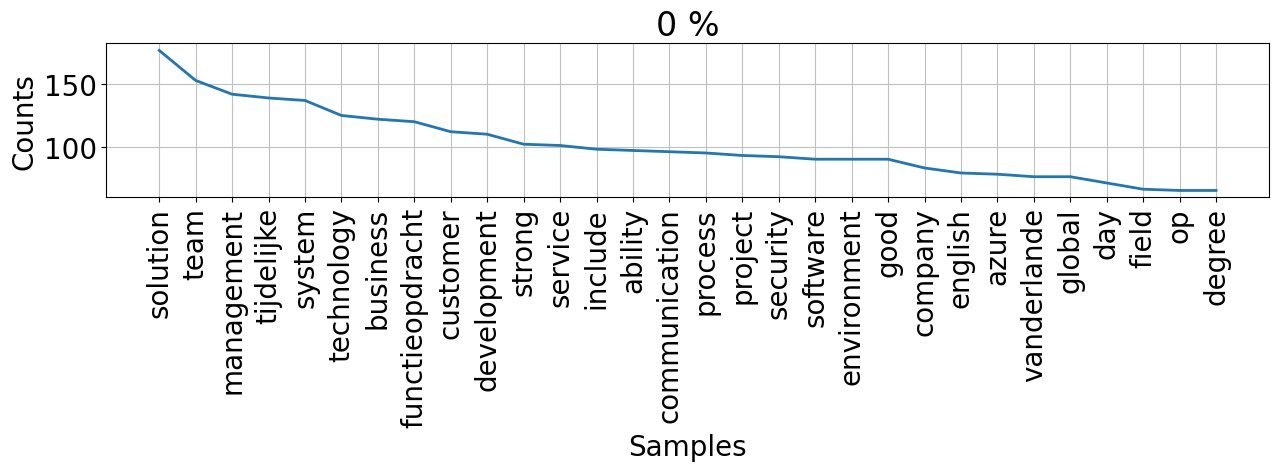

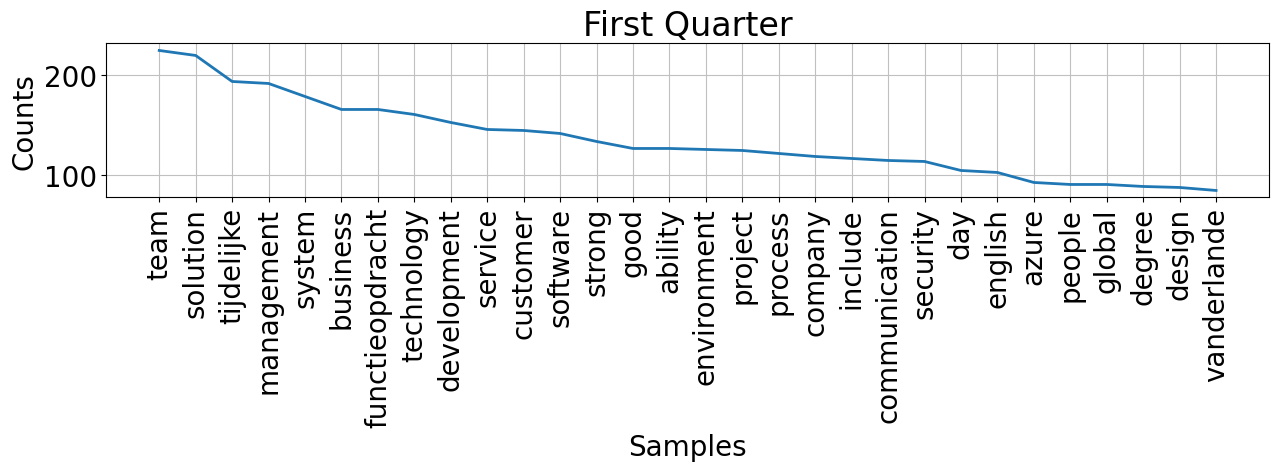

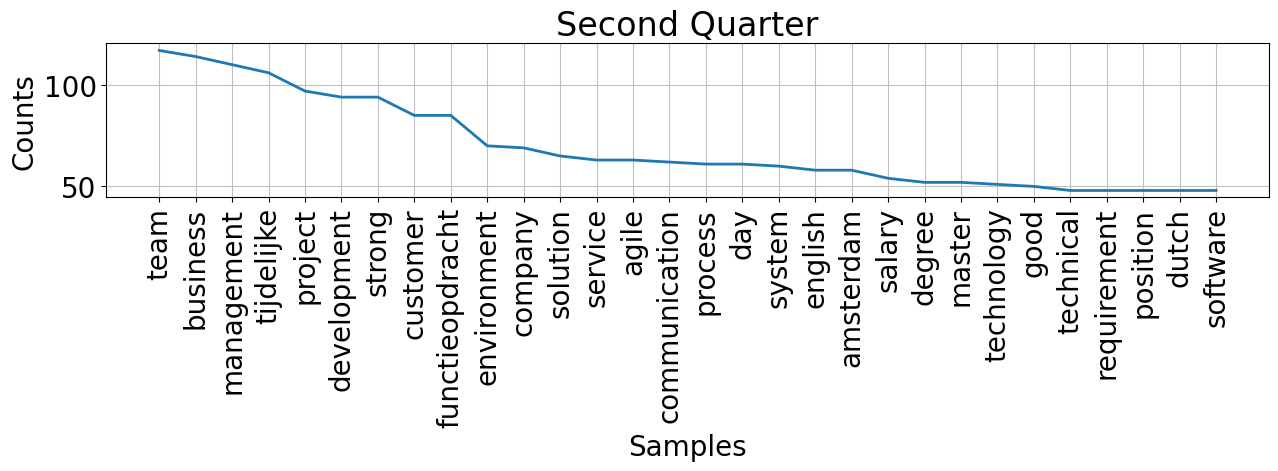

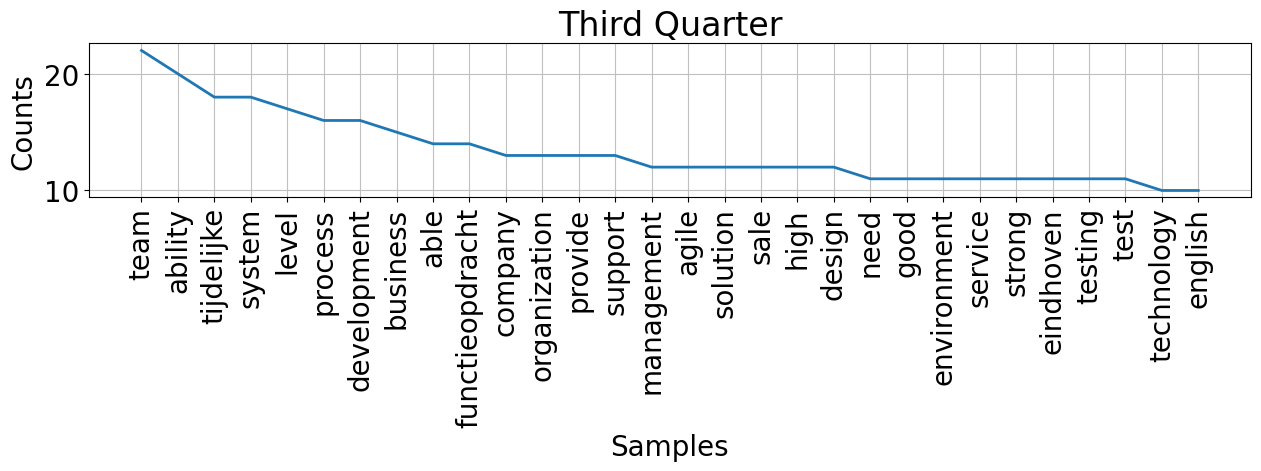

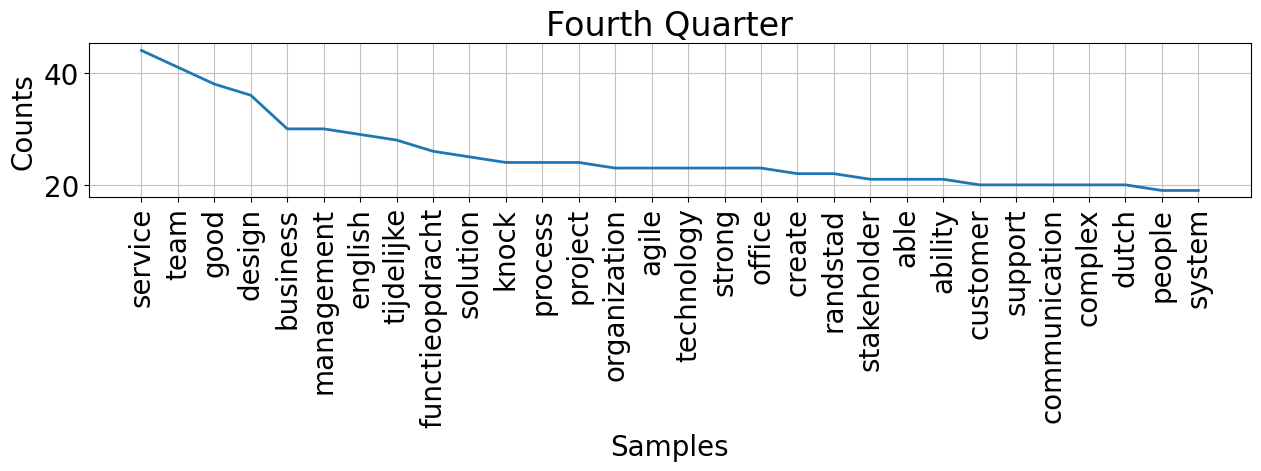

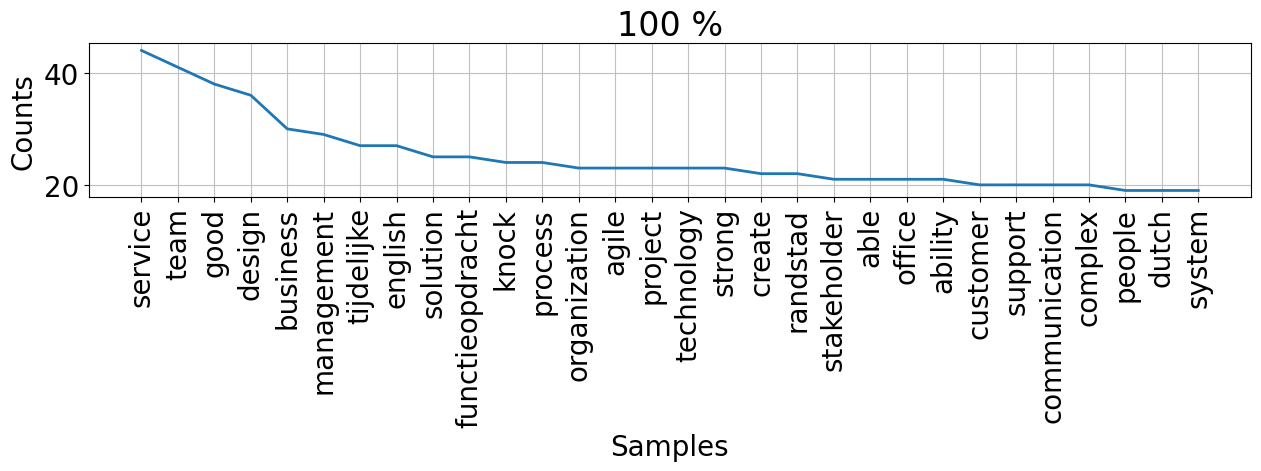

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = '20'

plt.figure(figsize=(15,2))
en0_filtered.plot(30,  title='0 %')
plt.figure(figsize=(15,2))
en1_filtered.plot(30,  title='First Quarter')
plt.figure(figsize=(15,2))
en2_filtered.plot(30,  title='Second Quarter')
plt.figure(figsize=(15,2))
en3_filtered.plot(30,  title='Third Quarter')
plt.figure(figsize=(15,2))
en4_filtered.plot(30,  title='Fourth Quarter')
plt.figure(figsize=(15,2))
en5_filtered.plot(30,  title='100 %')

In [19]:
total_0 = len(en0_filtered)
total_1 = len(en1_filtered)
total_2 = len(en2_filtered)
total_3 = len(en3_filtered)
total_4 = len(en4_filtered)
total_5 = len(en5_filtered)

# Convert to frequency proportions
fd0 = {word: count / total_1 for word, count in en0_filtered.items()}
fd1 = {word: count / total_2 for word, count in en1_filtered.items()}
fd2 = {word: count / total_3 for word, count in en2_filtered.items()}
fd3 = {word: count / total_4 for word, count in en3_filtered.items()}
fd4 = {word: count / total_3 for word, count in en4_filtered.items()}
fd5 = {word: count / total_4 for word, count in en5_filtered.items()}

all_words = set(fd0) | set(fd1) | set(fd2) | set(fd3) | set(fd4) | set(fd5)

# Build normalized DataFrame
freq_df = pd.DataFrame({
    'word': list(all_words),
    '0%': [fd0.get(word, 0) for word in all_words],
    'Q1': [fd1.get(word, 0) for word in all_words],
    'Q2': [fd2.get(word, 0) for word in all_words],
    'Q3': [fd3.get(word, 0) for word in all_words],
    'Q4': [fd4.get(word, 0) for word in all_words],
    '100%': [fd5.get(word, 0) for word in all_words]
})

freq_df.set_index('word', inplace=True)
freq_df['total'] = freq_df.sum(axis=1)
freq_df = freq_df.sort_values(by='total', ascending=False)

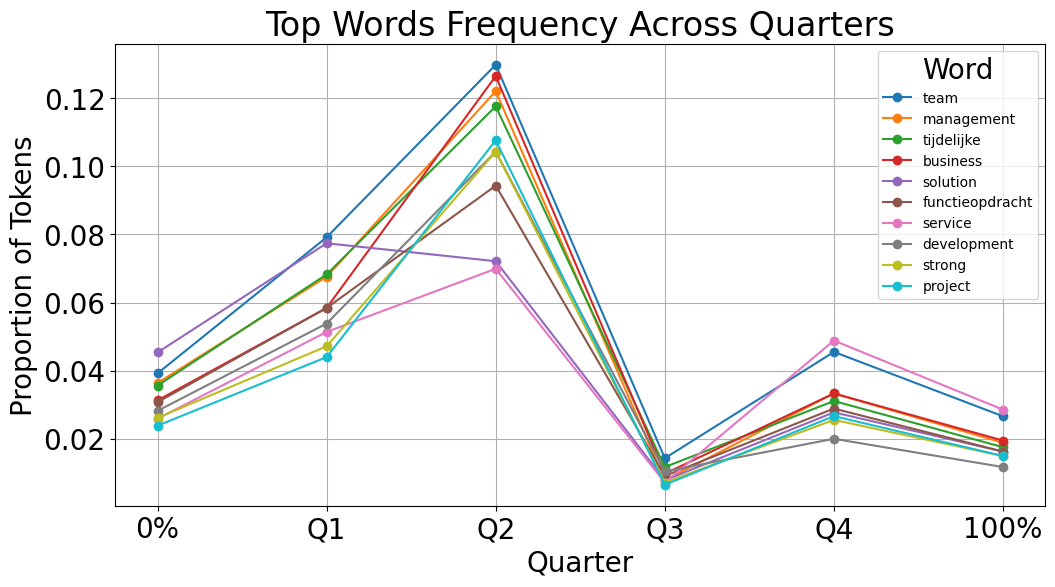

In [21]:
top_words = freq_df.head(10).index

freq_df.loc[top_words, ['0%', 'Q1', 'Q2', 'Q3', 'Q4', '100%']].T.plot(
    kind='line', marker='o', figsize=(12, 6)
)
plt.title("Top Words Frequency Across Quarters")
plt.xlabel("Quarter")
plt.ylabel("Proportion of Tokens")
plt.grid(True)
plt.legend(title="Word", prop={'size': 10})
plt.show()

In [23]:
from nltk import FreqDist
import numpy as np

lemmas_0 = nl0['filtered'].values
flat_0 = np.concatenate(lemmas_0).tolist()
nl_freq_dic_0 = FreqDist(flat_0)
display(nl_freq_dic_0)

lemmas_1 = nl1['filtered'].values
flat_1 = np.concatenate(lemmas_1).tolist()
nl_freq_dic_1=FreqDist(flat_1)
display(nl_freq_dic_1)

lemmas_2 = nl2['filtered'].values
flat_2_4 = np.concatenate(lemmas_2).tolist()
nl_freq_dic_2=FreqDist(flat_2_4)
display(nl_freq_dic_2)

lemmas_3 = nl3['filtered'].values
flat_3 = np.concatenate(lemmas_3).tolist()
nl_freq_dic_3=FreqDist(flat_3)
display(nl_freq_dic_3)

lemmas_4 = nl4['filtered'].values
flat_4_4 = np.concatenate(lemmas_4).tolist()
nl_freq_dic_4 = FreqDist(flat_4_4)
display(nl_freq_dic_4)

lemmas_5 = nl5['filtered'].values
flat_5_5 = np.concatenate(lemmas_5).tolist()
nl_freq_dic_5 = FreqDist(flat_5_5)
display(nl_freq_dic_5)

FreqDist({'ervaring': 5857, ' ': 5212, 'kennis': 3688, 'jaar': 2918, 'minimaal': 2040, 'noon': 1610, 'werk': 1587, 'werkervaring': 1467, 'werken': 1420, 'aantoonbaar': 1340, ...})

FreqDist({'ervaring': 6847, ' ': 6351, 'kennis': 4245, 'jaar': 3357, 'minimaal': 2352, 'noon': 1985, 'werk': 1920, 'werken': 1720, 'werkervaring': 1668, 'aantoonbaar': 1505, ...})

FreqDist({' ': 2132, 'ervaring': 2014, 'kennis': 1304, 'jaar': 986, 'werkervaring': 710, 'noon': 683, 'werk': 651, 'minimaal': 645, 'werken': 573, 'yacht': 571, ...})

FreqDist({'ervaring': 477, ' ': 448, 'kennis': 250, 'jaar': 195, 'noon': 147, 'werken': 138, 'werkervaring': 138, 'werk': 134, 'minimaal': 130, 'organisatie': 100, ...})

FreqDist({'ervaring': 915, ' ': 860, 'kennis': 536, 'jaar': 337, 'werken': 276, 'noon': 271, 'yacht': 252, 'minimaal': 251, 'werk': 250, 'organisatie': 238, ...})

FreqDist({'ervaring': 903, ' ': 840, 'kennis': 525, 'jaar': 321, 'werken': 269, 'noon': 266, 'minimaal': 241, 'yacht': 241, 'opdracht': 235, 'organisatie': 234, ...})

In [40]:
filters = [
    ' ', 'ervaring', 'kennis', 'jaar', 'werken', 'noon', 'yacht', 'datum', 'organisatie', 'werk', 
    '3','werkervaring', 'opdracht', 'aantoonbaar', 'minimaal', 'functieopdracht', 'i', 'ii', 'iii', 'iv', '2', 'per', '5',
    'eis', 'to', 'n', 'uur', 'candidates'
]

nl0_filtered = FreqDist({word: freq for word, freq in nl_freq_dic_0.items() if word not in filters})
nl1_filtered = FreqDist({word: freq for word, freq in nl_freq_dic_1.items() if word not in filters})
nl2_filtered = FreqDist({word: freq for word, freq in nl_freq_dic_2.items() if word not in filters})
nl3_filtered = FreqDist({word: freq for word, freq in nl_freq_dic_3.items() if word not in filters})
nl4_filtered = FreqDist({word: freq for word, freq in nl_freq_dic_4.items() if word not in filters})
nl5_filtered = FreqDist({word: freq for word, freq in nl_freq_dic_5.items() if word not in filters})

display(nl0_filtered)
display(nl1_filtered)
display(nl2_filtered)
display(nl3_filtered)
display(nl4_filtered)
display(nl5_filtered)

FreqDist({'kandidaat': 1053, 'tijdelijk': 1013, 'goed': 950, 'hbo': 933, 'omgeving': 889, 'relevant': 801, 'denkniveau': 784, 'volgen': 752, 'opleiding': 727, 'pr': 689, ...})

FreqDist({'goed': 1194, 'tijdelijk': 1191, 'kandidaat': 1188, 'hbo': 1085, 'omgeving': 1027, 'relevant': 921, 'opleiding': 915, 'denkniveau': 910, 'volgen': 892, 'it': 860, ...})

FreqDist({'goed': 440, 'omgeving': 384, 'opleiding': 368, 'hbo': 368, 'professional': 358, 'tijdelijk': 357, 'relevant': 352, 'team': 348, 'functie': 331, 'jr': 303, ...})

FreqDist({'relevant': 83, 'goed': 83, 'tijdelijk': 80, 'opleiding': 78, 'hbo': 77, 'team': 70, 'omgeving': 67, 'denkniveau': 63, 'scrum': 58, 'functie': 56, ...})

FreqDist({'tijdelijk': 176, 'goed': 166, 'omgeving': 143, 'pr': 141, 'hbo': 134, 'kandidaat': 134, 'volgen': 129, 'arbeidvoorwaarde': 127, 'team': 126, 'maken': 121, ...})

FreqDist({'tijdelijk': 175, 'goed': 164, 'omgeving': 142, 'pr': 141, 'hbo': 133, 'kandidaat': 132, 'volgen': 129, 'team': 125, 'denkniveau': 119, 'arbeidvoorwaarde': 119, ...})

<Axes: title={'center': '100 %'}, xlabel='Samples', ylabel='Counts'>

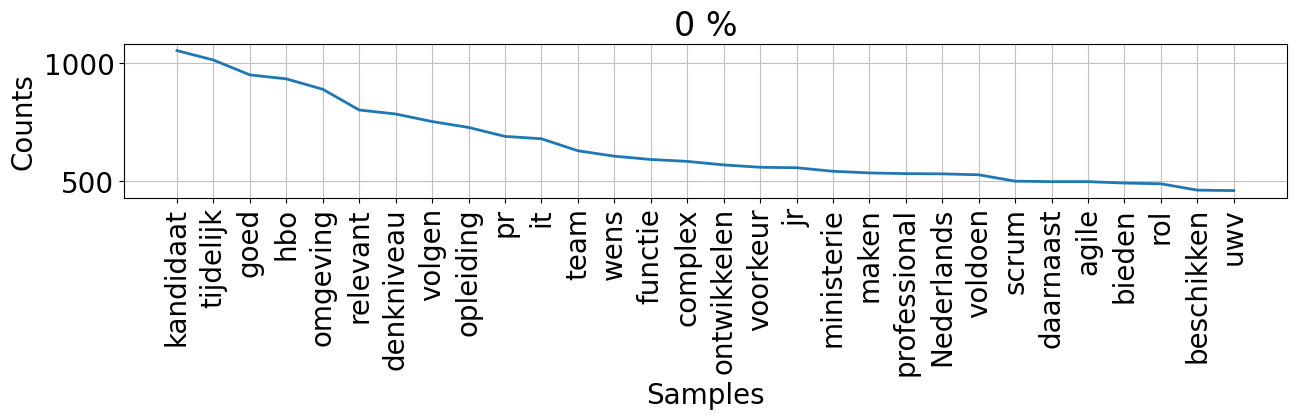

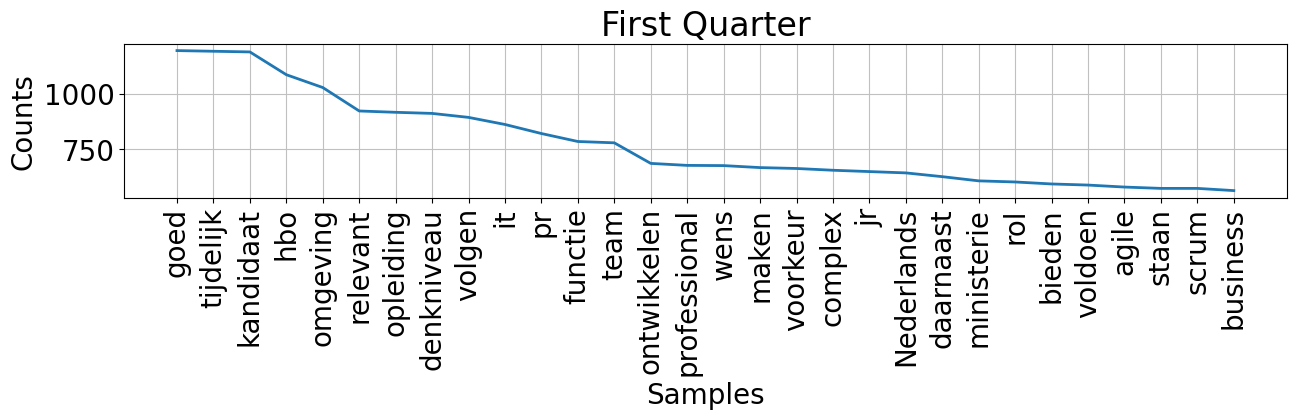

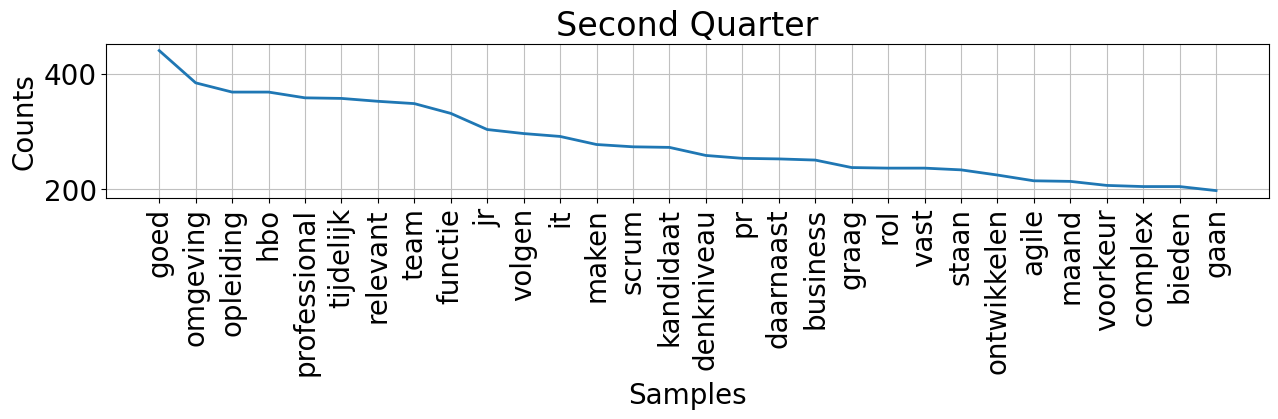

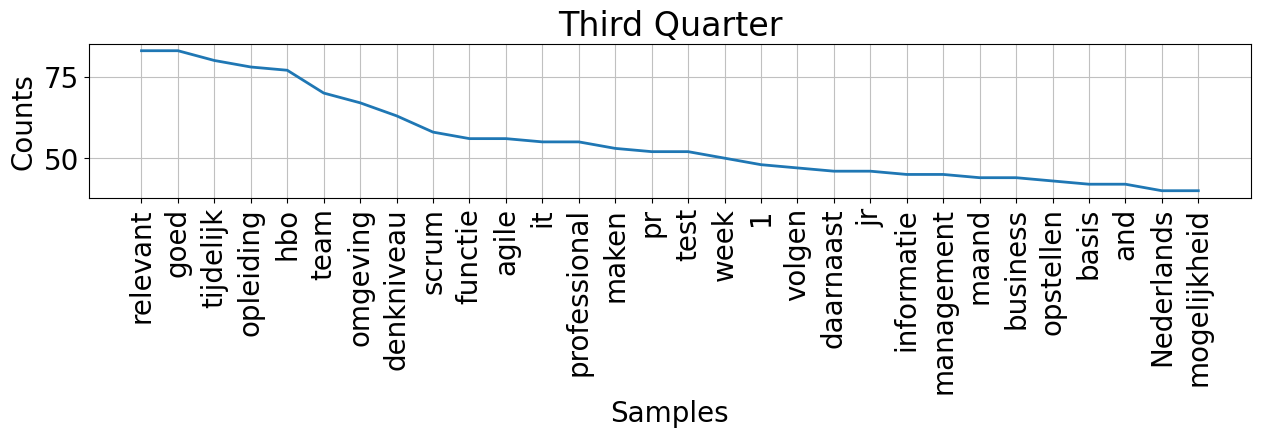

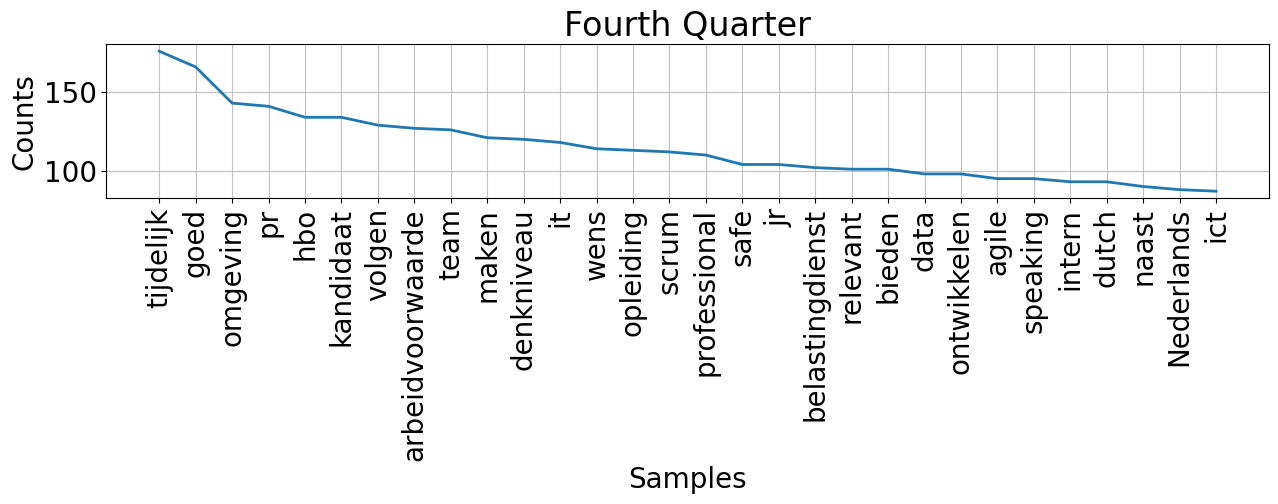

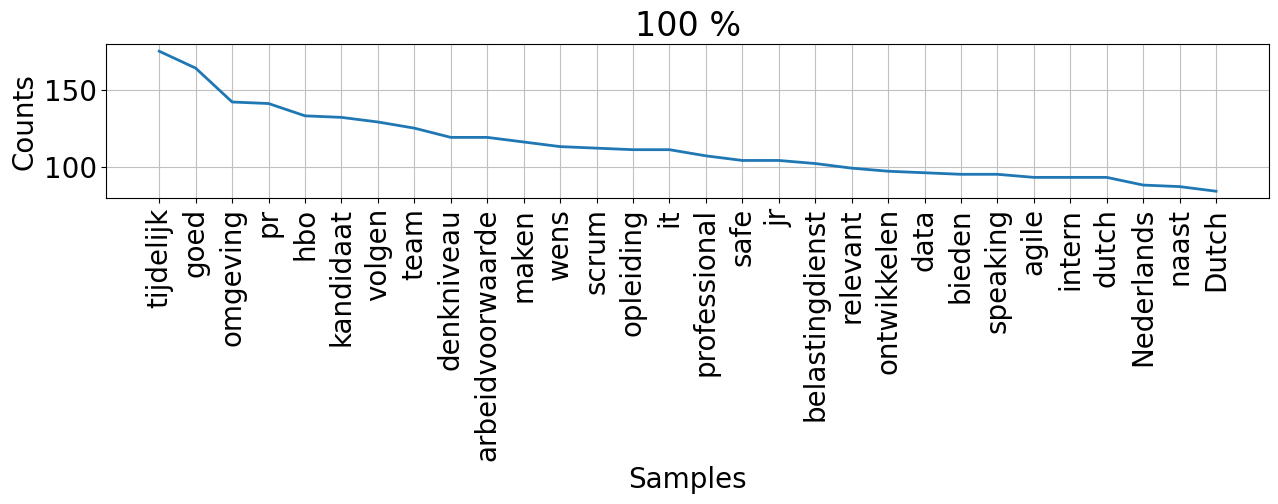

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = '20'

plt.figure(figsize=(15,2))
nl0_filtered.plot(30,  title='0 %')
plt.figure(figsize=(15,2))
nl1_filtered.plot(30,  title='First Quarter')
plt.figure(figsize=(15,2))
nl2_filtered.plot(30,  title='Second Quarter')
plt.figure(figsize=(15,2))
nl3_filtered.plot(30,  title='Third Quarter')
plt.figure(figsize=(15,2))
nl4_filtered.plot(30,  title='Fourth Quarter')
plt.figure(figsize=(15,2))
nl5_filtered.plot(30,  title='100 %')